# Project_3_Biogic_analysis
* Qing Dou
* Github:https://github.com/qdou14/biopic_analysis

## 1 Introduction

This study evaluates diversity in biopics, focusing on race and gender representation, and their impact on box office earnings. We'll examine data from numerous biopics, analyzing gender and race of subjects, and their financial success. Research questions include:

* Representation: How are various races and genders depicted in top-grossing films?
* Correlation: Does diversity correlate with box office performance?
* Trends: Are there changes in diversity representation over time?

We'll also use Bechdel test data to enhance our analysis, offering a thorough perspective on biographical film diversity. 




## 2: Data Summary

* This project uses a biopics dataset from FiveThirtyEight, available on GitHub (https://github.com/fivethirtyeight/data/tree/master/biopics).The dataset includes films depicting real-life individuals. 
* Additionally, I incorporated gender bias data from the Bechdel Test website (https://bechdeltest.com/api/v1/doc, to assess female representation in these films). 
* The complete dataset and analysis are in my GitHub repository(https://github.com/qdou14/biopic_analysis).

In [89]:
# Importing the DataProcess class.
from src.biogic_analysis.data_summary import DataProcess

# URL of the biopics dataset.
data_url = 'https://raw.githubusercontent.com/qdou14/biopic_analysis/main/dataset/biopics_dataset.csv'

# Initialize the DataProcess object with the dataset URL.
data_processor = DataProcess(data_url)

In [90]:
# Retrieve the dataset as a DataFrame.
df = data_processor.get_data()

# Display the first five rows of the dataset.
df.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz


In [91]:
# Check the data types of each column.
column_types = df.dtypes
column_types

title                 object
site                  object
country               object
year_release           int64
box_office            object
director              object
number_of_subjects     int64
subject               object
type_of_subject       object
race_known            object
subject_race          object
person_of_color        int64
subject_sex           object
lead_actor_actress    object
dtype: object

The 'box_office' column contains financial figures as strings, which will be converted to float for analysis using convert_box_office().

In [92]:
# Convert the 'box_office' column values to numerical format.
data_processor.convert_box_office()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,NaN,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,56700000.0,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,18300000.0,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,NaN,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,537000.0,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,Young Man with a Horn,http://www.imdb.com/title/tt0043153/,US,1950,NaN,Michael Curtiz,1,Bix Beiderbecke,Musician,Known,White,0,Male,Kirk Douglas
757,Young Mr. Lincoln,http://www.imdb.com/title/tt0032155/,US,1939,NaN,John Ford,1,Abraham Lincoln,World leader,Known,White,0,Male,Henry Fonda
758,Young Tom Edison,http://www.imdb.com/title/tt0033289/,US,1940,NaN,Norman Taurog,1,Thomas Edison,Other,Known,White,0,Male,Mickey Rooney
759,Young Winston,http://www.imdb.com/title/tt0069528/,US,1972,NaN,Richard Attenborough,1,Winston Churchill,World leader,Known,White,0,Male,Simon Ward


* Our analysis combine the Bechdel Test, a standard assessing gender bias in films, conceived by cartoonist Alison Bechdel in 1985. 
* We enhanced our dataset with a 'rating' column from BechdelTest.com via the getMoviesByTitle API, quantifying films on a scale from 0 to 3, where 3 indicates a pass and 0-2 represent various levels of gender bias criteria.
* Incorporating the Bechdel Test into our analysis introduces a complexity that requires additional processing time.

In [93]:
# Update the DataFrame with Bechdel ratings for each movie.
data_processor.update_dataframe_with_bechdel()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,bechdel_rating
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,NaN,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough,1
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,56700000.0,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,3
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,18300000.0,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,3
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,NaN,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher,None
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,537000.0,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,Young Man with a Horn,http://www.imdb.com/title/tt0043153/,US,1950,NaN,Michael Curtiz,1,Bix Beiderbecke,Musician,Known,White,0,Male,Kirk Douglas,None
757,Young Mr. Lincoln,http://www.imdb.com/title/tt0032155/,US,1939,NaN,John Ford,1,Abraham Lincoln,World leader,Known,White,0,Male,Henry Fonda,2
758,Young Tom Edison,http://www.imdb.com/title/tt0033289/,US,1940,NaN,Norman Taurog,1,Thomas Edison,Other,Known,White,0,Male,Mickey Rooney,None
759,Young Winston,http://www.imdb.com/title/tt0069528/,US,1972,NaN,Richard Attenborough,1,Winston Churchill,World leader,Known,White,0,Male,Simon Ward,None


To facilitate our analysis, the add_category method adds a 'category' column to our DataFrame to track diversity by combining subjects' race and gender in biopics.

In [94]:
# Add a 'category' column.
data_processor.add_category()
# Retrieve and display the first five rows of the DataFrame.
data_processor.get_data().head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,bechdel_rating,category
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,NaN,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough,1,<NA>
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,56700000.0,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,3,Non-White Male
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,18300000.0,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,3,<NA>
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,NaN,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher,None,White Male
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,537000.0,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,None,<NA>


Checking the update data

In [95]:
# Get the number of rows and columns of the DataFrame.
data_processor.get_shape()

(761, 16)

In [96]:
# Check the data types after update.
column_types = df.dtypes
column_types

title                  object
site                   object
country                object
year_release            int64
box_office            float64
director               object
number_of_subjects      int64
subject                object
type_of_subject        object
race_known             object
subject_race           object
person_of_color         int64
subject_sex            object
lead_actor_actress     object
bechdel_rating         object
category               object
dtype: object

In [97]:
# Calculate the percentage of missing values for each column.
missing_values = data_processor.missing_data()
missing_values

title                  0.000000
site                   0.000000
country                0.000000
year_release           0.000000
box_office            42.575558
director               0.000000
number_of_subjects     0.000000
subject                0.000000
type_of_subject        0.000000
race_known             0.000000
subject_race          25.886991
person_of_color        0.000000
subject_sex            0.000000
lead_actor_actress     0.919842
bechdel_rating        70.959264
category              25.886991
dtype: float64

Due to the limited database of only 5,000 films on the Bechdel Test website, there is a significant amount of missing data in our dataset.

In [98]:
# Check information about the dataset.
data_processor.check_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               761 non-null    object 
 1   site                761 non-null    object 
 2   country             761 non-null    object 
 3   year_release        761 non-null    int64  
 4   box_office          437 non-null    float64
 5   director            761 non-null    object 
 6   number_of_subjects  761 non-null    int64  
 7   subject             761 non-null    object 
 8   type_of_subject     761 non-null    object 
 9   race_known          761 non-null    object 
 10  subject_race        564 non-null    object 
 11  person_of_color     761 non-null    int64  
 12  subject_sex         761 non-null    object 
 13  lead_actor_actress  754 non-null    object 
 14  bechdel_rating      221 non-null    object 
 15  category            564 non-null    object 
dtypes: float

| Variable | Description |
|----------|-------------|
| title | Title of the film. |
| site | URL from IMDB. |
| country | Country of origin. |
| year_release | Year of release. |
| box_office | Gross earnings at U.S. box office. |
| director | Director of film. |
| number_of_subjects | The number of subjects featured in the film. |
| subject | The actual name of the featured subject. |
| type_of_subject | The occupation of subject or reason for recognition. |
| race_known | Indicates whether the subject’s race was discernible based on background of self, parent, or grandparent. |
| subject_race | Race of the subject. |
| person_of_color | Dummy variable that indicates person of color. |
| subject_sex | Sex of subject. |
| lead_actor_actress | The actor or actress who played the subject. |
| rating | The actual score. Number from 0 to 3 (0 means no two women, 1 means no talking, 2 means talking about a man, 3 means it passes the test). |
| category | Categorizing subjects into 'White Male', 'White Female', 'Non-White Male', 'Non-White Female', or 'Unknown'. |

In [99]:
# Generate summary statistics for categorical columns in the DataFrame.
data_processor.describe_categorical()

,title,site,country,director,subject,type_of_subject,race_known,subject_race,subject_sex,lead_actor_actress,bechdel_rating,category
count,761,761,761,761,761,761,761,564,761,754,221,564
unique,668,672,7,488,699,27,2,17,2,574,4,4
top,The Bang Bang Club,http://www.imdb.com/title/tt1173687/,US,Richard Attenborough,Jesus,Other,Known,White,Male,Leonardo DiCaprio,3,White Male
freq,4,4,489,9,7,159,564,428,584,7,116,326


From this table, we can already draw some preliminary conclusions. It suggests a dominance of white male subjects in films, indicating racial and gender bias in films.

To ensure real-time updates to our analysis without exporting to CSV, we use the %load_ext autoreload and %autoreload 2 commands in our notebook, allowing for automatic reloading of external content.

In [100]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 3: Exploratory Data Analysis

In [101]:
# Import the EDA class from the exploratory_data_analysis.
from src.biogic_analysis.exploratory_data_analysis import EDA

# Create an instance of the EDA class.
eda = EDA(df)

#### Analysing the attribute subject_race

In [102]:
# Count occurrences of each race in 'subject_race' column.
country_subject_race = eda.unique_value_counts('subject_race')
country_subject_race

White                        428
African American              35
Multi racial                  24
Hispanic (Latin American)     13
Middle Eastern (White)        13
Middle Eastern                11
African                        9
Hispanic (Latino)              6
Hispanic (White)               6
Asian                          5
Native American                4
Asian American                 3
Indian                         2
Caribbean                      2
Mediterranean                  1
Eurasian                       1
Hispanic (Latina)              1
Name: subject_race, dtype: int64

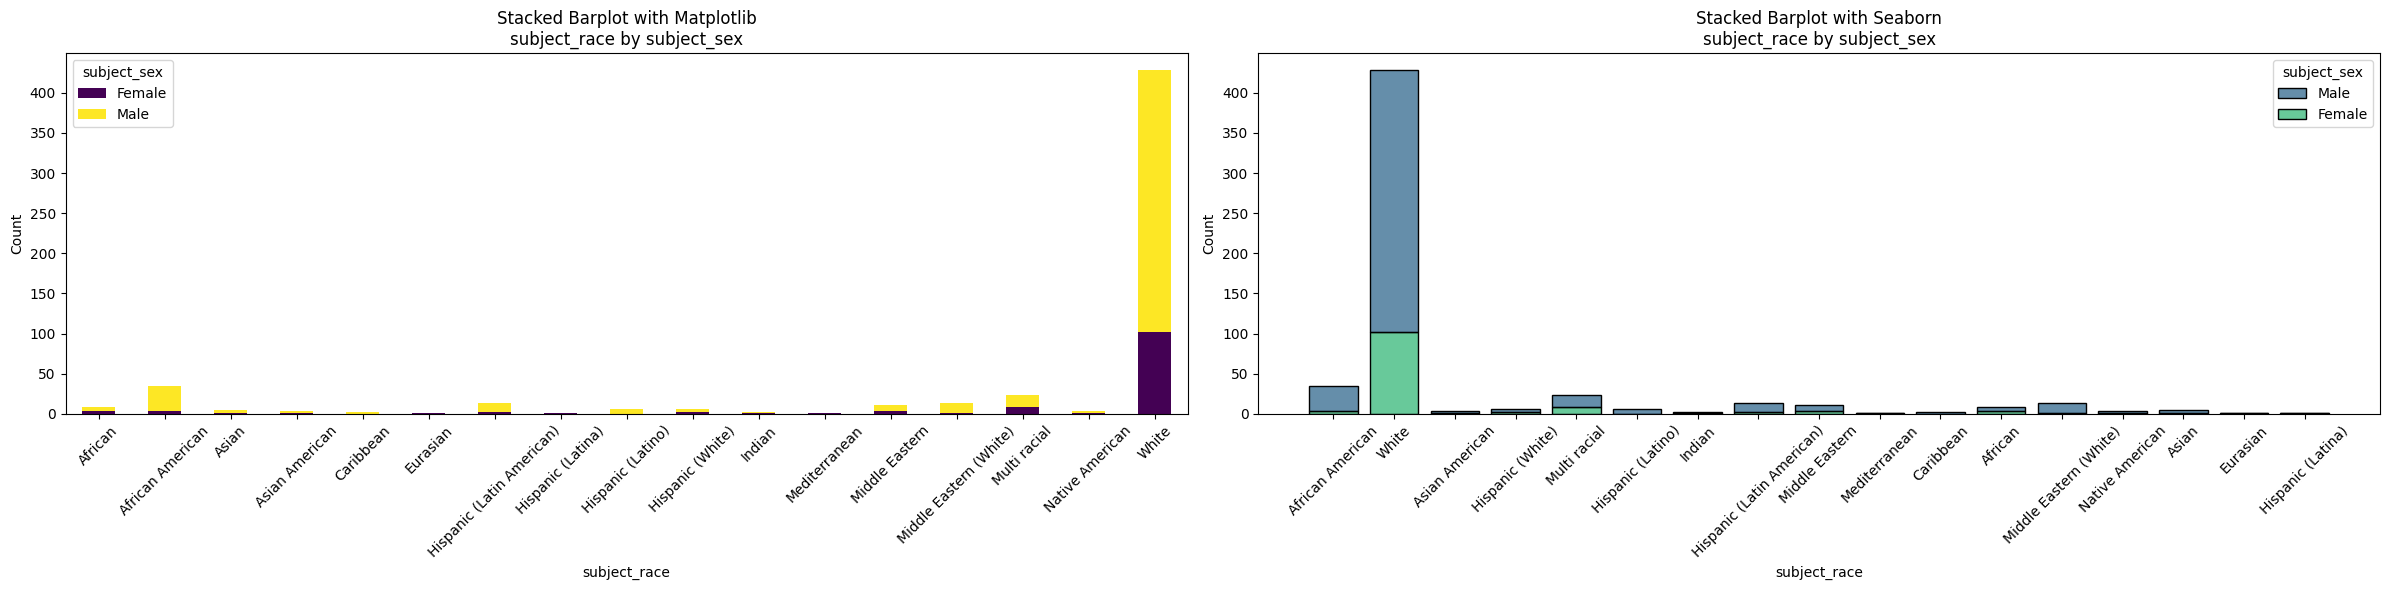

In [103]:
# Display a stacked plot of race and sex distributions.
eda.combined_category_plot('subject_race', 'subject_sex')

From this chart, we can conclude:

* The representation of males is higher than females across almost all racial categories.
* The "White" category has the highest count for both sexes, with a larger male representation.

#### Analysing the attribute type_of_subject

In [104]:
# Get the count of unique values in the 'type_of_subject' column.
country_types_of_subject = eda.unique_value_counts('type_of_subject')
country_types_of_subject

Other                     159
Criminal                   81
Musician                   76
Historical                 76
Athlete                    74
Author                     45
Military                   45
Activist                   31
Artist                     29
Academic                   21
Singer                     20
World leader               17
Actress                    16
Media                      15
Actor                      14
Author (poet)              13
Medicine                    9
Comedian                    7
Government                  4
Journalist                  2
Military / activist         1
Politician                  1
Teacher                     1
Actress / activist          1
Actress                     1
Athlete / military          1
Academic (Philosopher)      1
Name: type_of_subject, dtype: int64

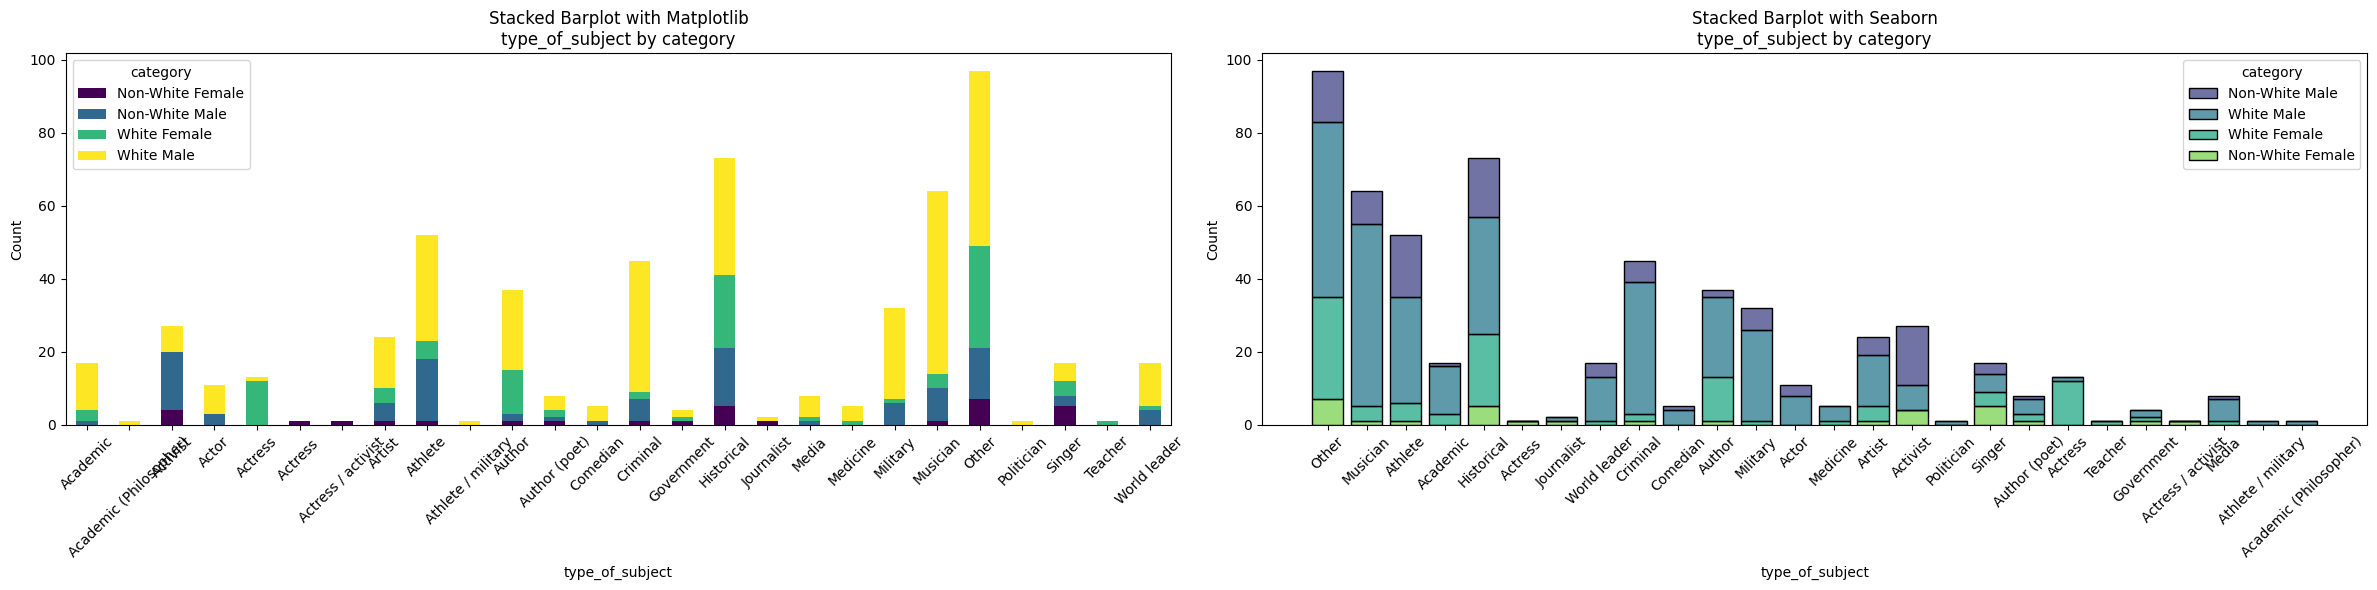

In [105]:
eda.combined_category_plot('type_of_subject', 'category')

The graph indicates the following:

* White males are predominantly represented across all categories.
* This prominence of white males is particularly noticeable in categories such as politicians and businesspeople.
* Women of color appear to have the lowest representation in nearly all categories, especially noticeable within the politician, businessperson, and scientist categories.

#### Analysing the attribute bechdel_rating

In [106]:
# Get count of each Bechdel rating in 'bechdel_rating' column.
country_bechdel_rating = eda.unique_value_counts('bechdel_rating')
country_bechdel_rating

3    116
1     56
2     32
0     17
Name: bechdel_rating, dtype: int64

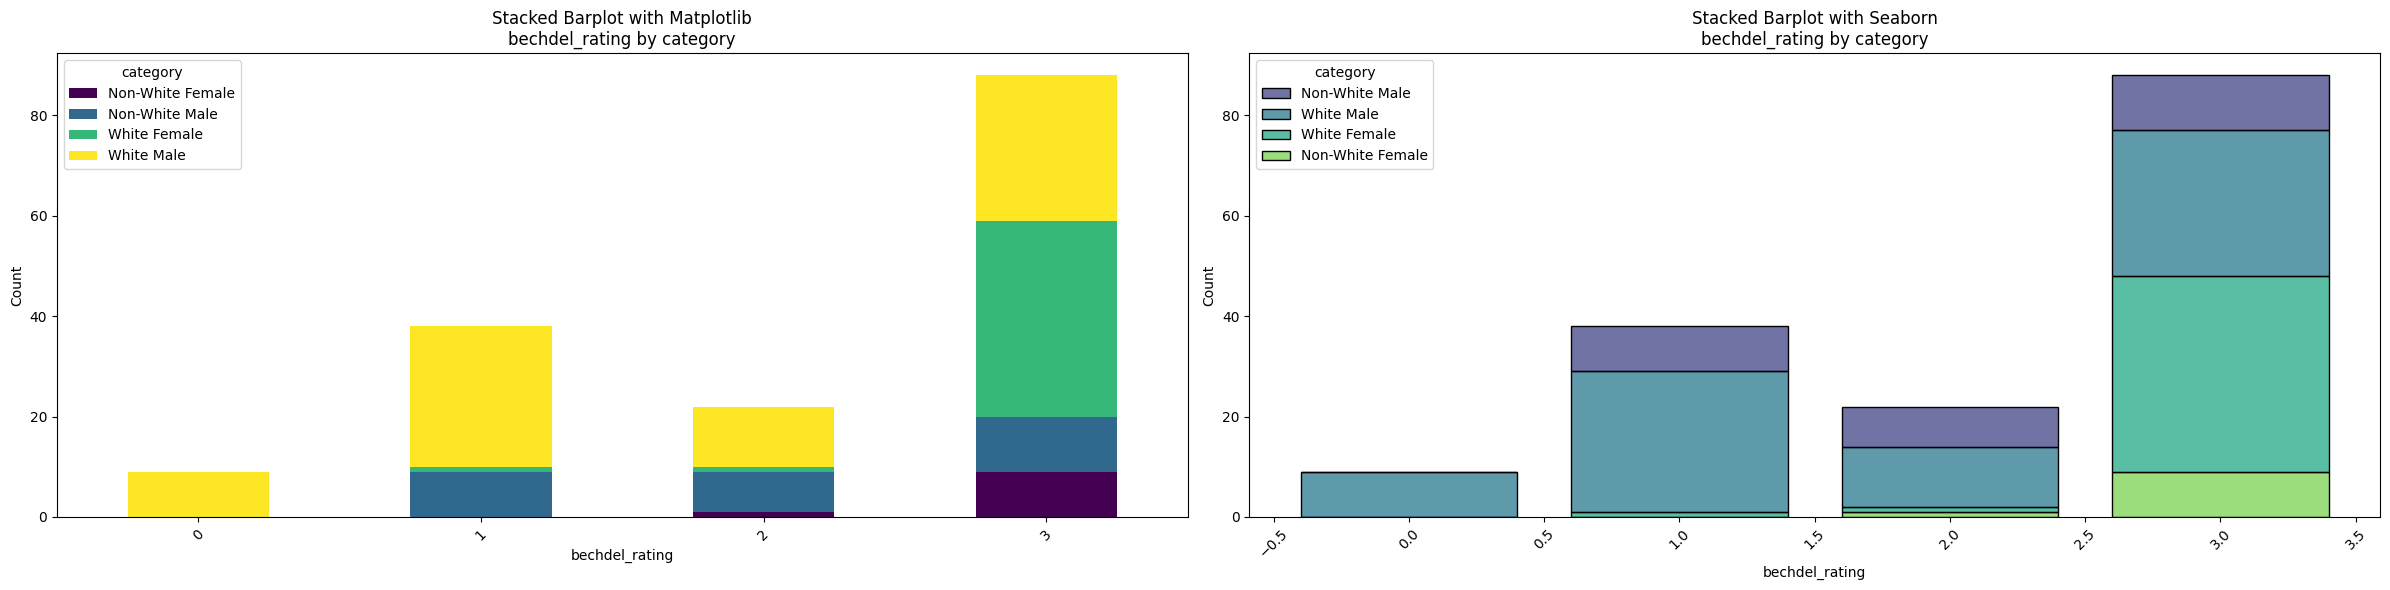

In [107]:
eda.combined_category_plot('bechdel_rating', 'category')

From the chart, we can draw the following conclusions:

* In the 0 rating category, white males are notably the most represented group.
* For the 1 and 2 rating categories, white males make up the majority, followed by non-white males.
* In the 3 rating category, the number of females increases significantly.

#### Analysing the attribute year_release

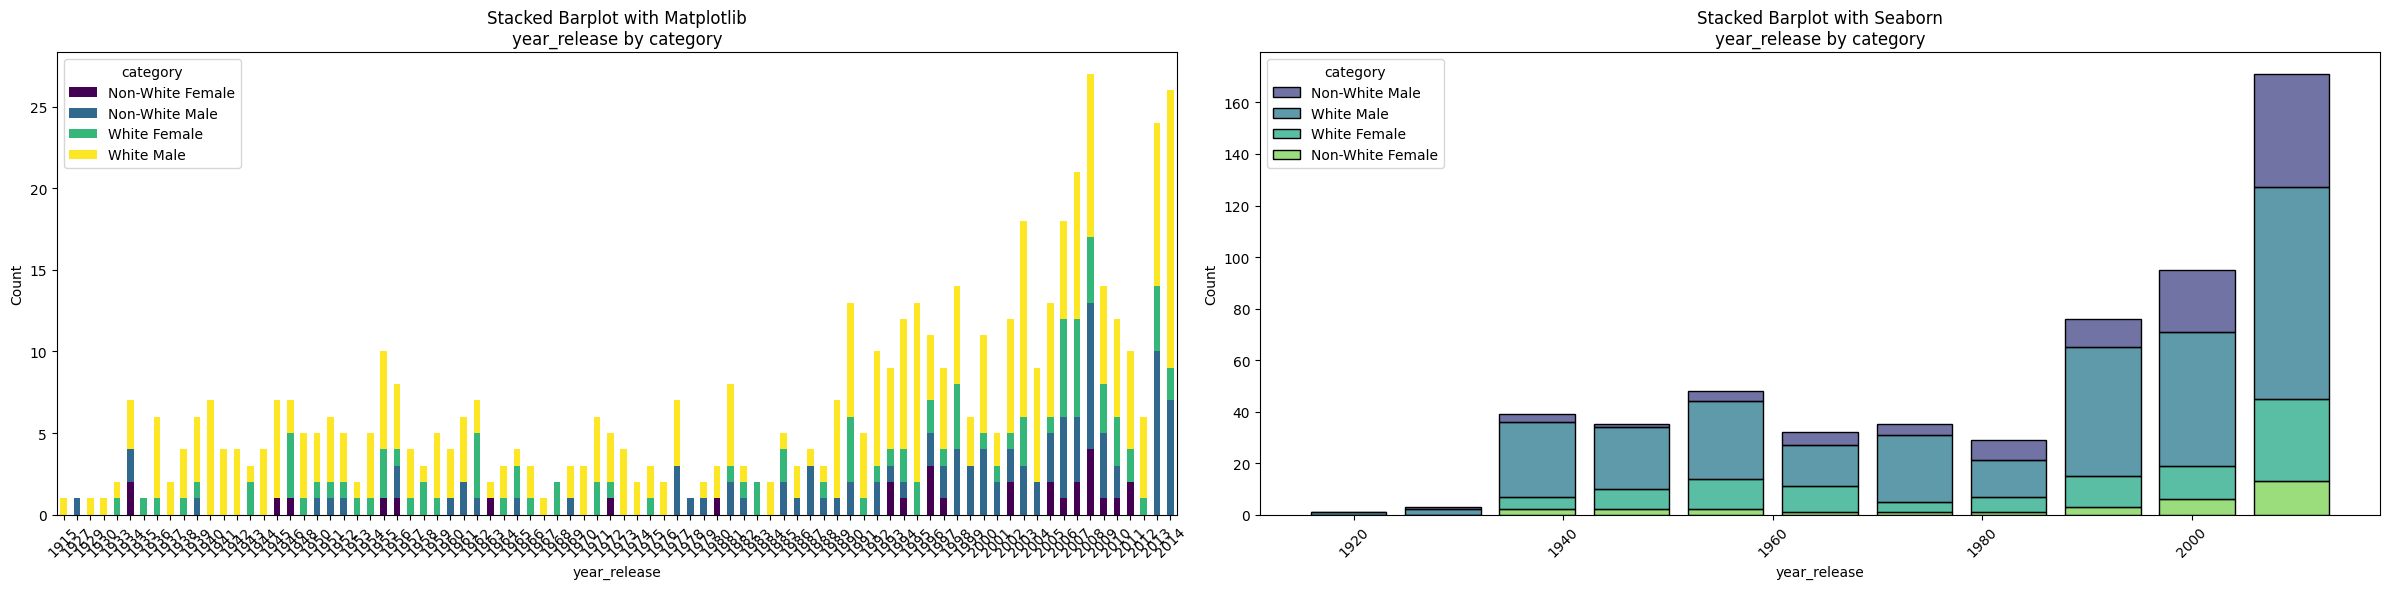

In [108]:
eda.combined_category_plot('year_release', 'category')

From the chart, we observe:

* The number of documentaries released has been increasing since 1915.
* Prior to 1975, white males predominantly dominated the annual releases, likely reflecting the era's biases and possibly lower representation of people of color.
* Although there has been a growth in representation for other racial and gender groups, they have not surpassed that of white males.


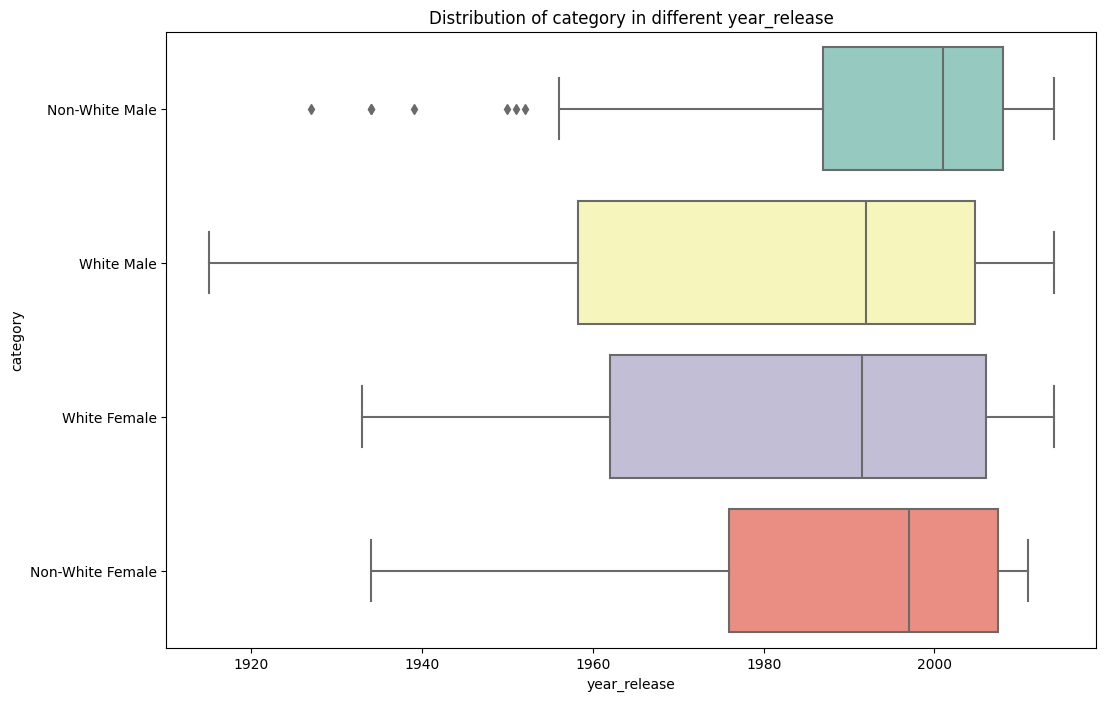

In [109]:
# Create a boxplot comparing 'year_release' and 'category' in the EDA instance.
eda.column_boxplot('year_release', 'category')

The chart clearly illustrates that:

* Non-white male and white male categories span a broader range of release years.
* White females are represented over a more limited timeframe than males.
* Non-white females show the smallest range with a more recent median release year.

#### Analysing the attribute box_office

In [110]:
# Get descriptive statistics for the 'box_office' column.
box_office_stats = eda.describe_stats('box_office')
box_office_stats

count    3.170000e+02
mean     2.137525e+07
std      3.385941e+07
min      3.150000e+03
25%      1.230000e+06
50%      6.200000e+06
75%      3.000000e+07
max      2.560000e+08
Name: box_office, dtype: float64

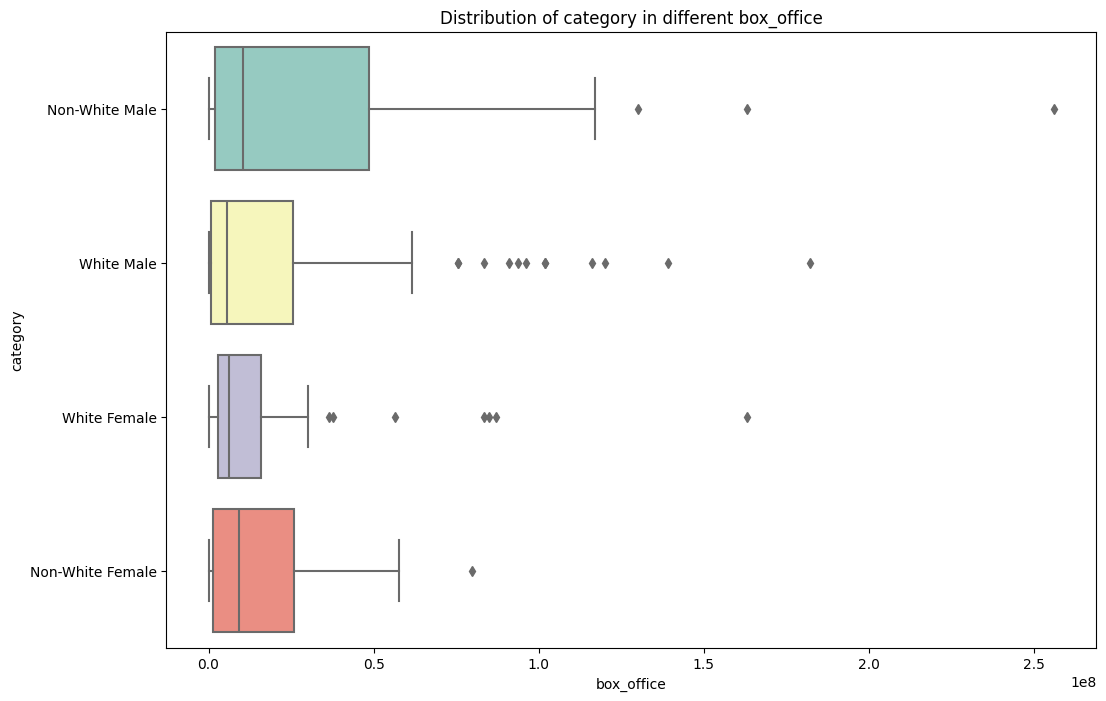

In [111]:
# Plot 'box_office' data using a column plot method in EDA.
eda.column_boxplot("box_office",'category')

The chart suggests:

* Non-white females show the lowest median box office revenue with minimal variation.
* White males command higher median revenues with a broader revenue range.
* Non-white males and white females share similar median revenues, but non-white males exhibit greater revenue variability.

## 4: Inference

In [112]:
# Import the Inference class from the inference module in the src/biogic_analysis directory.
from src.biogic_analysis.inference import Inference

# Create an instance of the Inference class using a pandas DataFrame 'df'
inference_analysis = Inference(df)


#### How does the representation of women, as measured by the Bechdel Test, vary across different types of subjects in film?

<Figure size 1000x800 with 0 Axes>

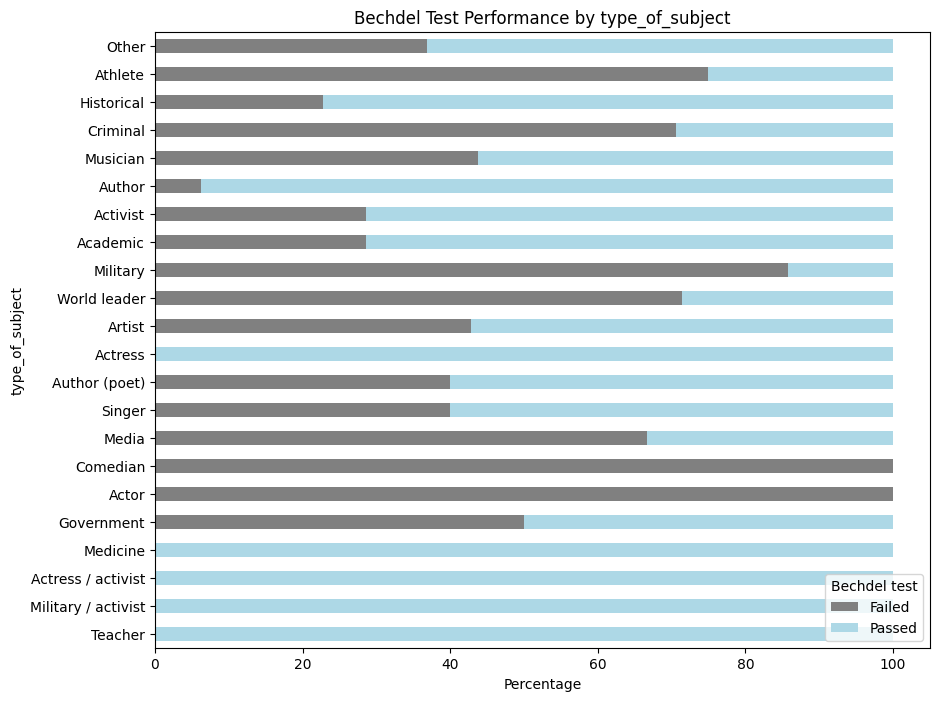

In [113]:
# Based on the Bechdel test ratings associated with different types of subjects.
inference_analysis.bechdel_test_plot('type_of_subject', 'bechdel_rating')

The data suggests that documentaries about teachers, actresses, the medical profession, and authors often pass the Bechdel Test, indicating better representation of women in these fields. In contrast, those about athletes, military, world leaders, and comedians rarely pass, implying women's roles in these spheres may be less represented or centered around men.

#### Diversity in Gender and Race:

What is the representation of characters of different races and genders in the top 100 highest-grossing films?

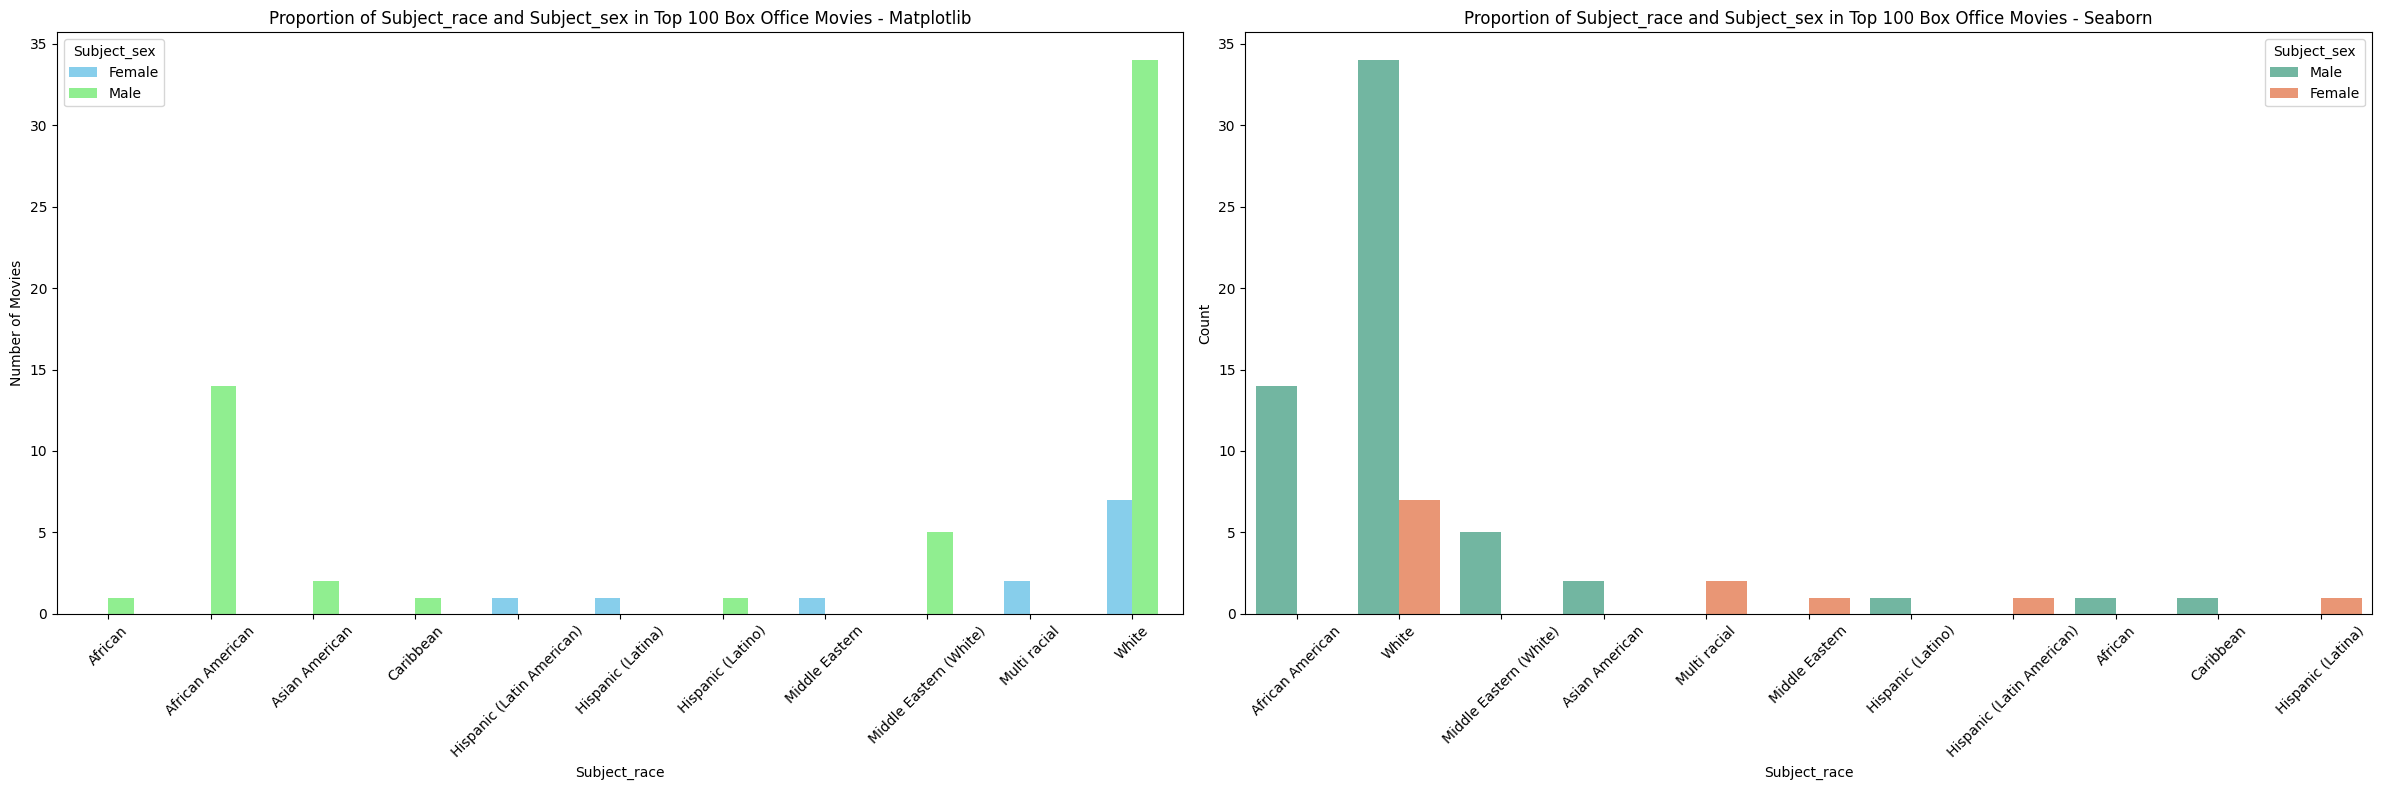

In [114]:
# Analyze the proportion of different races and sexes in the top box office category.
inference_analysis.proportion_in_top_box_office('subject_race', 'subject_sex')

The chart shows a clear dichotomy in representation:

* White males and females dominate character roles in the top 100 grossing films.
* Non-white males are slightly more represented than non-white females but far less than their white counterparts.
A significant racial and gender imbalance favors white individuals.
* Non-white females are the least represented group.

#### Box Office and Diversity Relationship:

Does the racial and gender diversity of a movie affect its box office performance?

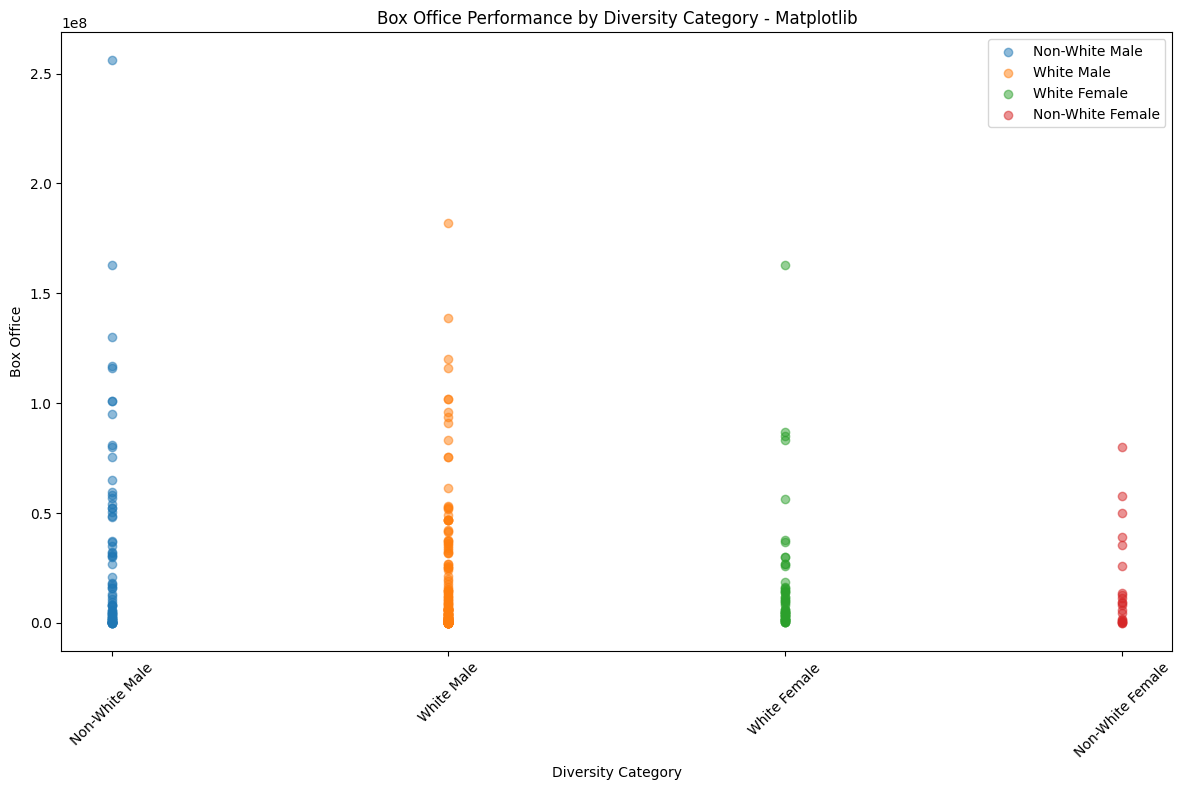

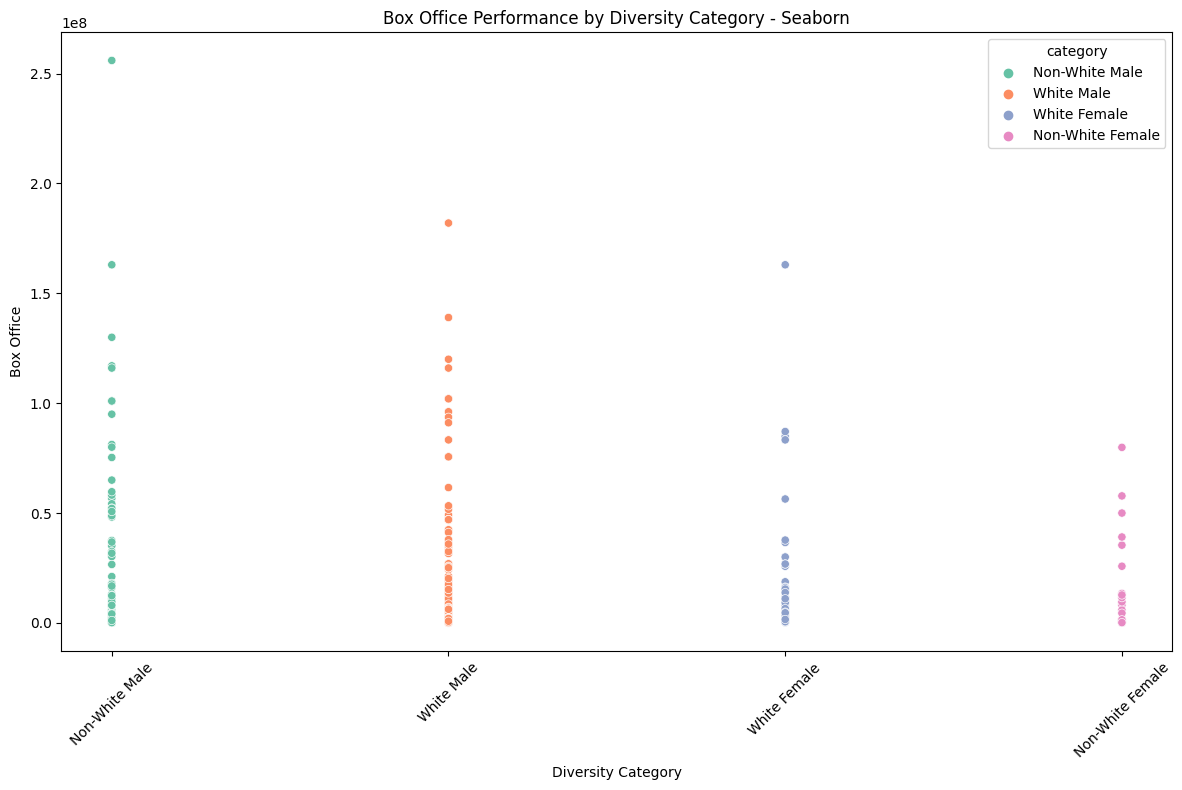

In [115]:
# Evaluate the correlation between box office success and diversity factors.
inference_analysis.box_office_diversity_correlation()

The chart suggests:

* "White Male" films have a wide range of box office earnings, with frequent high peaks.
* "Non-White Female" films generally earn less at the box office, reflecting industry biases or disparities in opportunities.

#### Time Trend Analysis:

Has there been an improvement in racial and gender diversity in movies in recent years?

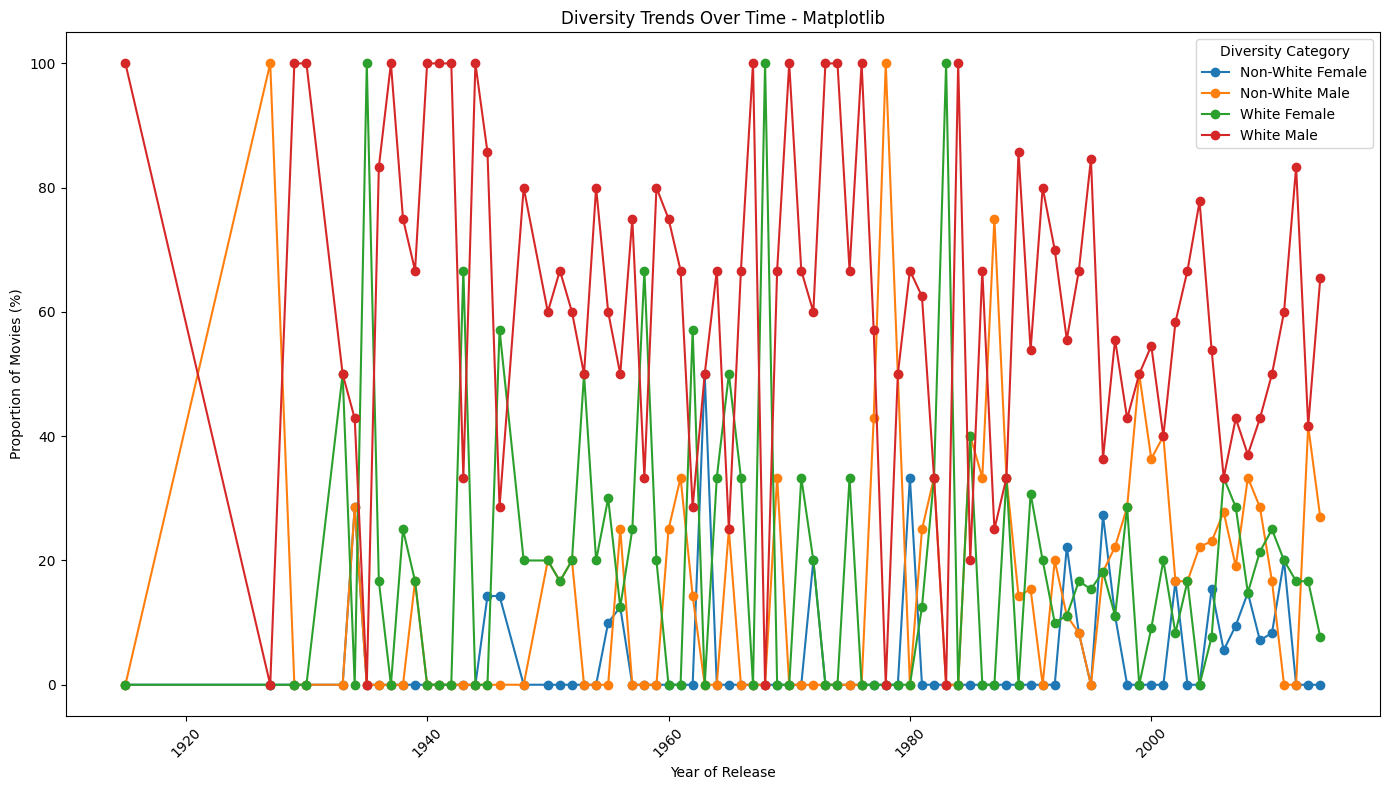

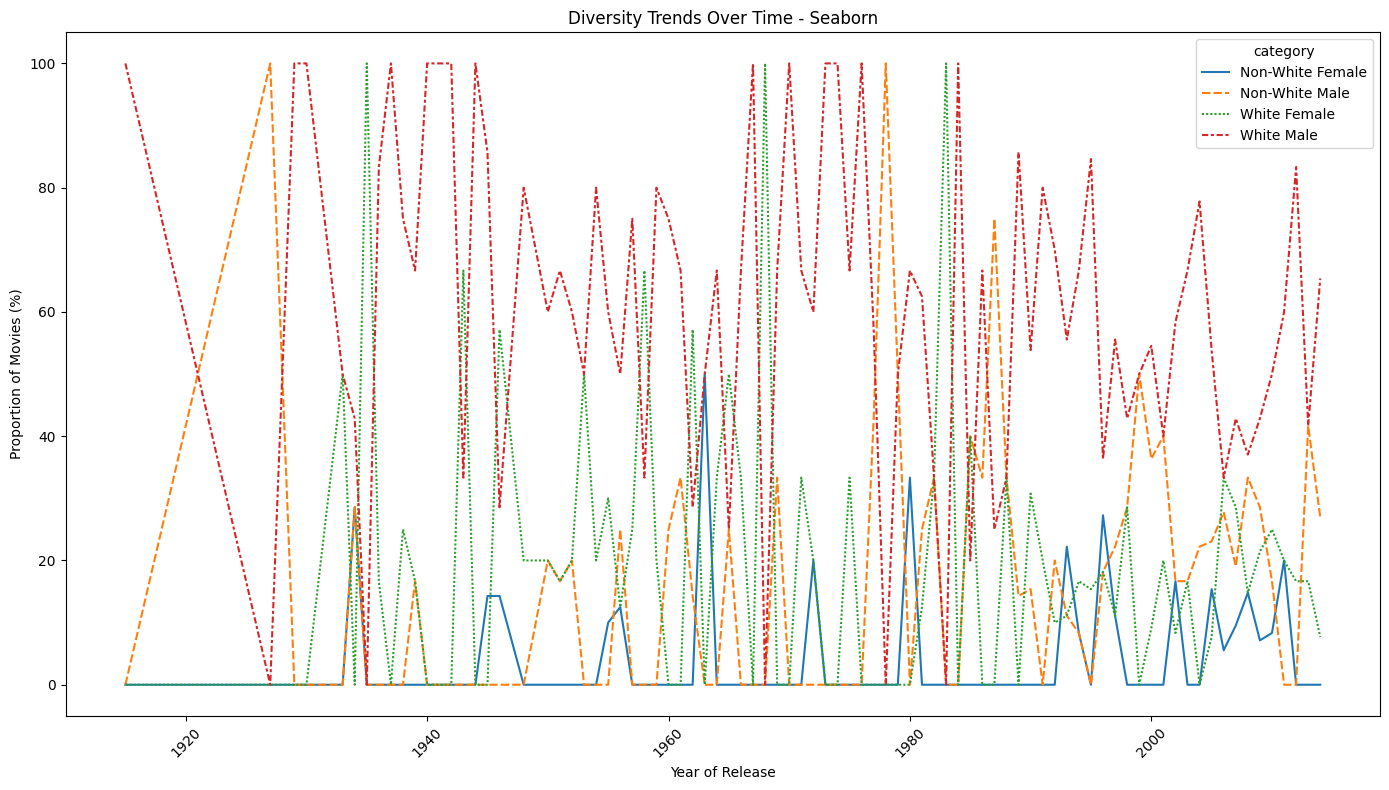

In [116]:
# Examine trends in diversity over time in relation to the dataset.
inference_analysis.diversity_trends_over_time()

The chart reveals:

* Representation varies greatly over time, with the most fluctuation seen in White Male roles and the least in Non-White Female roles.
* White Males have consistently dominated film roles.
* There's a recent uptick in roles for Non-White actors, hinting at progress in diversity, though they still lag behind White Males.

## 5: Conclusion

The analysis of Hollywood biographical films from 1915 to 2014 reveals a stark imbalance in gender and racial representation. About a quarter of these films featured women, with only 21 focusing on women of color. Over 80% of subjects were white and 77% male, a trend also evident in the top 100 highest-grossing films. The 1990s saw a significant skew towards white subjects.

This pattern reflects historical societal biases, particularly the early focus on white male figures in biopics. While there has been some progress in recent years, the imbalance is still pronounced. Emerging platforms like television and Netflix, however, provide avenues for more diverse biographical stories. This shift highlights the ongoing need to diversify storytelling in the biographical film genre.

## References

- Molin, S. (2019, July 9). *Hands-On Data Analysis with Pandas*.
- 'Straight Outta Compton' Is The Rare Biopic Not About White Dudes. (2015, August 14). Retrieved from [https://fivethirtyeight.com/features/]